In [1]:
import pandas as pd
import numpy as np

### Data preparation

In [2]:
df = pd.read_csv('raw-Copy1.githubusercontent.com_alexeygrigorev_datasets_master_housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

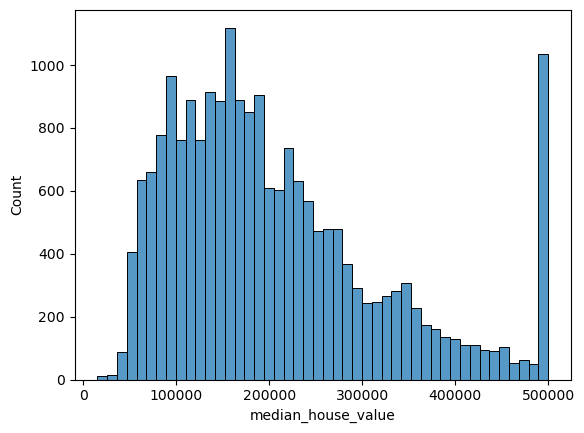

In [5]:
sns.histplot(df.median_house_value)

## Preparing the dataset

In [6]:
prox_ocean_option = ['<1H OCEAN', 'INLAND']
  
# selecting rows based on condition
sub_df = df[df['ocean_proximity'].isin(prox_ocean_option)]

In [7]:
sub_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
price_logs = np.log1p(sub_df.median_house_value)

<Axes: xlabel='median_house_value', ylabel='Count'>

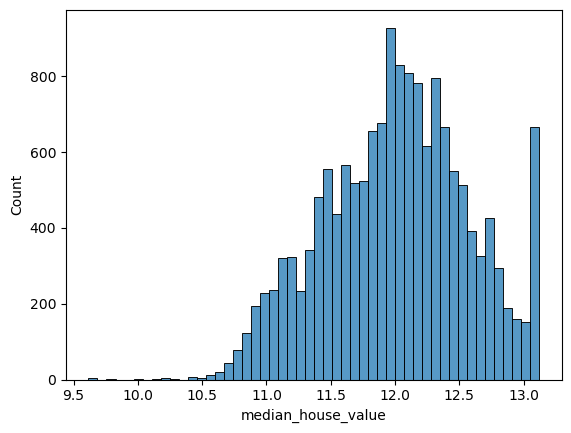

In [9]:
sns.histplot(price_logs, bins=50)

## Question 1

In [10]:
sub_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

total_bedrooms

## Question 2

In [11]:
sub_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


1195

## Prepare and split the dataset

In [12]:
n = len(sub_df)


n_val = int(len(sub_df) * 0.2)
n_test = int(len(sub_df) * 0.2)
n_train = n - n_val - n_test

In [13]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [14]:
df_train = sub_df.iloc[n_train:]
df_val = sub_df.iloc[n_train:n_train+n_val]
df_test = sub_df.iloc[n_train+n_val:]

In [15]:
idx = np.arange(n)

In [16]:
np.random.seed(42)
np.random.shuffle(idx)

In [17]:
df_train = sub_df.iloc[idx[n_train:]]
df_val = sub_df.iloc[idx[n_train:n_train+n_val]]
df_test = sub_df.iloc[idx[n_train+n_val:]]

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [20]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [21]:
len(df_train), len(df_val), len(df_test)

(6274, 3137, 3137)

In [22]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.09,37.02,9.0,1608.0,297.0,1057.0,295.0,3.7143,INLAND
1,-117.88,33.84,34.0,1410.0,214.0,837.0,240.0,6.1168,<1H OCEAN
2,-118.21,33.95,32.0,1116.0,328.0,1265.0,302.0,2.2950,<1H OCEAN
3,-119.32,36.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,INLAND
4,-117.11,33.14,10.0,3208.0,636.0,1395.0,582.0,3.4455,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6269,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,<1H OCEAN
6270,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504,<1H OCEAN
6271,-118.15,34.07,52.0,1983.0,344.0,887.0,331.0,3.2875,<1H OCEAN
6272,-119.81,36.78,37.0,1965.0,364.0,796.0,335.0,3.6250,INLAND


## Question 3

In [23]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [24]:
mean_value=df_train['total_bedrooms'].mean()

In [25]:
mean_value

539.2817581709869

In [26]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.09,37.02,9.0,1608.0,297.0,1057.0,295.0,3.7143,INLAND
1,-117.88,33.84,34.0,1410.0,214.0,837.0,240.0,6.1168,<1H OCEAN
2,-118.21,33.95,32.0,1116.0,328.0,1265.0,302.0,2.2950,<1H OCEAN
3,-119.32,36.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,INLAND
4,-117.11,33.14,10.0,3208.0,636.0,1395.0,582.0,3.4455,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6269,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,<1H OCEAN
6270,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504,<1H OCEAN
6271,-118.15,34.07,52.0,1983.0,344.0,887.0,331.0,3.2875,<1H OCEAN
6272,-119.81,36.78,37.0,1965.0,364.0,796.0,335.0,3.6250,INLAND


In [27]:
df_train.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        63
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [28]:
df_train_1 = df_train.copy()

In [29]:
df_train_2 = df_train.copy()

In [30]:
df_train_3 = df_train.copy()

In [31]:
df_train_4 = df_train.copy()

In [32]:
df_train_5 = df_train.copy()

In [33]:
df_train_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,6274.000000,6274.000000,6274.000000,6274.000000,6211.000000,6274.000000,6274.000000,6274.000000
mean,-119.224216,35.486187,27.167357,2647.599617,539.281758,1450.478323,499.164170,3.800677
std,1.793579,2.081965,12.026104,2142.823976,423.562240,1083.450044,378.894887,1.861926
min,-124.140000,32.610000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.110000,33.950000,17.000000,1447.250000,296.000000,805.000000,280.000000,2.504800
50%,-118.370000,34.160000,27.000000,2142.000000,433.000000,1201.000000,410.000000,3.482700
75%,-117.990000,37.350000,36.000000,3156.750000,644.000000,1768.750000,599.750000,4.705175
max,-114.550000,41.860000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [34]:
df_train_1.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        63
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [35]:
df_train_1['total_bedrooms'] = df_train_1['total_bedrooms'].fillna(0)

In [36]:
df_train_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000
mean,-119.224216,35.486187,27.167357,2647.599617,533.866592,1450.478323,499.164170,3.800677
std,1.793579,2.081965,12.026104,2142.823976,424.846604,1083.450044,378.894887,1.861926
min,-124.140000,32.610000,1.000000,6.000000,0.000000,3.000000,2.000000,0.499900
25%,-121.110000,33.950000,17.000000,1447.250000,292.000000,805.000000,280.000000,2.504800
50%,-118.370000,34.160000,27.000000,2142.000000,430.000000,1201.000000,410.000000,3.482700
75%,-117.990000,37.350000,36.000000,3156.750000,641.000000,1768.750000,599.750000,4.705175
max,-114.550000,41.860000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [37]:
df_train_1.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [38]:
df_train_2.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        63
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

In [39]:
mean_value=df_train_2['total_bedrooms'].mean()

In [40]:
df_train_2['total_bedrooms'].fillna(value=mean_value, inplace=True)

In [41]:
df_train_2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000,6274.000000
mean,-119.224216,35.486187,27.167357,2647.599617,539.281758,1450.478323,499.164170,3.800677
std,1.793579,2.081965,12.026104,2142.823976,421.429947,1083.450044,378.894887,1.861926
min,-124.140000,32.610000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.110000,33.950000,17.000000,1447.250000,298.000000,805.000000,280.000000,2.504800
50%,-118.370000,34.160000,27.000000,2142.000000,436.500000,1201.000000,410.000000,3.482700
75%,-117.990000,37.350000,36.000000,3156.750000,641.000000,1768.750000,599.750000,4.705175
max,-114.550000,41.860000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100


In [42]:
df_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object

In [43]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [44]:
base = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

df_train[base]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,9.0,1608.0,297.0,1057.0,295.0,3.7143
1,34.0,1410.0,214.0,837.0,240.0,6.1168
2,32.0,1116.0,328.0,1265.0,302.0,2.2950
3,29.0,2409.0,436.0,1142.0,440.0,3.6895
4,10.0,3208.0,636.0,1395.0,582.0,3.4455
...,...,...,...,...,...,...
6269,41.0,1256.0,407.0,855.0,383.0,1.9923
6270,19.0,4043.0,764.0,2196.0,708.0,6.1504
6271,52.0,1983.0,344.0,887.0,331.0,3.2875
6272,37.0,1965.0,364.0,796.0,335.0,3.6250


In [45]:
X_train_1 = df_train_1[base].values

In [46]:
X_train_1

array([[9.0000e+00, 1.6080e+03, 2.9700e+02, 1.0570e+03, 2.9500e+02,
        3.7143e+00],
       [3.4000e+01, 1.4100e+03, 2.1400e+02, 8.3700e+02, 2.4000e+02,
        6.1168e+00],
       [3.2000e+01, 1.1160e+03, 3.2800e+02, 1.2650e+03, 3.0200e+02,
        2.2950e+00],
       ...,
       [5.2000e+01, 1.9830e+03, 3.4400e+02, 8.8700e+02, 3.3100e+02,
        3.2875e+00],
       [3.7000e+01, 1.9650e+03, 3.6400e+02, 7.9600e+02, 3.3500e+02,
        3.6250e+00],
       [4.6000e+01, 3.4020e+03, 5.0300e+02, 1.3890e+03, 5.0400e+02,
        5.3462e+00]])

In [47]:
y_train

array([11.3095968 , 12.27326857, 11.95247633, ..., 12.3647886 ,
       11.33141558, 12.50766132])

In [48]:
w0, w =train_linear_regression(X_train_1, y_train)

In [49]:
y_pred_1 = w0 + X_train_1.dot(w)

<Axes: ylabel='Count'>

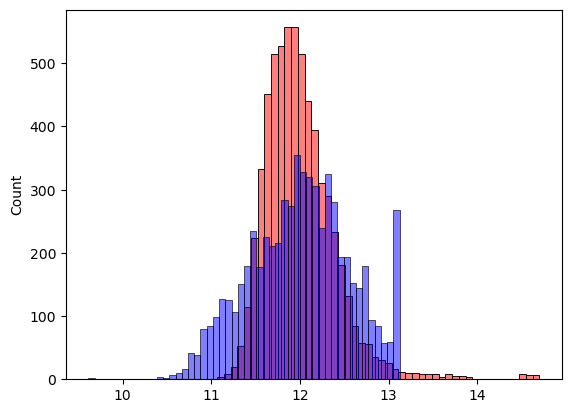

In [50]:
sns.histplot(y_pred_1, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

*******************************************************************************************************************************

In [51]:
X_train_2 = df_train_2[base].values

In [52]:
X_train_2

array([[9.0000e+00, 1.6080e+03, 2.9700e+02, 1.0570e+03, 2.9500e+02,
        3.7143e+00],
       [3.4000e+01, 1.4100e+03, 2.1400e+02, 8.3700e+02, 2.4000e+02,
        6.1168e+00],
       [3.2000e+01, 1.1160e+03, 3.2800e+02, 1.2650e+03, 3.0200e+02,
        2.2950e+00],
       ...,
       [5.2000e+01, 1.9830e+03, 3.4400e+02, 8.8700e+02, 3.3100e+02,
        3.2875e+00],
       [3.7000e+01, 1.9650e+03, 3.6400e+02, 7.9600e+02, 3.3500e+02,
        3.6250e+00],
       [4.6000e+01, 3.4020e+03, 5.0300e+02, 1.3890e+03, 5.0400e+02,
        5.3462e+00]])

In [53]:
y_train

array([11.3095968 , 12.27326857, 11.95247633, ..., 12.3647886 ,
       11.33141558, 12.50766132])

In [54]:
w0, w =train_linear_regression(X_train_2, y_train)

In [55]:
y_pred_2 = w0 + X_train_2.dot(w)

<Axes: ylabel='Count'>

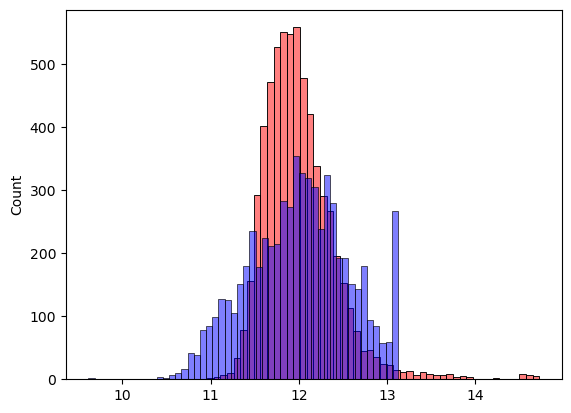

In [56]:
sns.histplot(y_pred_2, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## 2.9 RMSE

In [57]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [58]:
rmse(y_train, y_pred_1)

0.39168243891533133

In [59]:
round(rmse(y_train, y_pred_1),2)

0.39

In [60]:
rmse(y_train, y_pred_2)

0.39137048130064234

In [61]:
round(rmse(y_train, y_pred_2),2)

0.39

Both are equally good

## Question 4

In [62]:
df_train_3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.09,37.02,9.0,1608.0,297.0,1057.0,295.0,3.7143,INLAND
1,-117.88,33.84,34.0,1410.0,214.0,837.0,240.0,6.1168,<1H OCEAN
2,-118.21,33.95,32.0,1116.0,328.0,1265.0,302.0,2.2950,<1H OCEAN
3,-119.32,36.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,INLAND
4,-117.11,33.14,10.0,3208.0,636.0,1395.0,582.0,3.4455,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6269,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,<1H OCEAN
6270,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504,<1H OCEAN
6271,-118.15,34.07,52.0,1983.0,344.0,887.0,331.0,3.2875,<1H OCEAN
6272,-119.81,36.78,37.0,1965.0,364.0,796.0,335.0,3.6250,INLAND


In [63]:
df_train_3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.09,37.02,9.0,1608.0,297.0,1057.0,295.0,3.7143,INLAND
1,-117.88,33.84,34.0,1410.0,214.0,837.0,240.0,6.1168,<1H OCEAN
2,-118.21,33.95,32.0,1116.0,328.0,1265.0,302.0,2.2950,<1H OCEAN
3,-119.32,36.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,INLAND
4,-117.11,33.14,10.0,3208.0,636.0,1395.0,582.0,3.4455,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6269,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,<1H OCEAN
6270,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504,<1H OCEAN
6271,-118.15,34.07,52.0,1983.0,344.0,887.0,331.0,3.2875,<1H OCEAN
6272,-119.81,36.78,37.0,1965.0,364.0,796.0,335.0,3.6250,INLAND


In [64]:
for v in ['<1H OCEAN', 'INLAND']:
    df_train_3['ocean_proximity_%s' % v] = (df_train_3.ocean_proximity == v).astype('int')

In [65]:
df_train_3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND
0,-120.09,37.02,9.0,1608.0,297.0,1057.0,295.0,3.7143,INLAND,0,1
1,-117.88,33.84,34.0,1410.0,214.0,837.0,240.0,6.1168,<1H OCEAN,1,0
2,-118.21,33.95,32.0,1116.0,328.0,1265.0,302.0,2.2950,<1H OCEAN,1,0
3,-119.32,36.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,INLAND,0,1
4,-117.11,33.14,10.0,3208.0,636.0,1395.0,582.0,3.4455,<1H OCEAN,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6269,-118.14,34.15,41.0,1256.0,407.0,855.0,383.0,1.9923,<1H OCEAN,1,0
6270,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504,<1H OCEAN,1,0
6271,-118.15,34.07,52.0,1983.0,344.0,887.0,331.0,3.2875,<1H OCEAN,1,0
6272,-119.81,36.78,37.0,1965.0,364.0,796.0,335.0,3.6250,INLAND,0,1


In [66]:
df_train_3.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms               63
population                    0
households                    0
median_income                 0
ocean_proximity               0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
dtype: int64

In [67]:
df_train_3['total_bedrooms'] = df_train_3['total_bedrooms'].fillna(0)

In [68]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [69]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r + np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [70]:
X_train = prepare_X(df_train_3)
w0, w = train_linear_regression_reg(X_train, y_train, r=0)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3981996136779408

In [71]:
X_train = prepare_X(df_train_3)
w0, w = train_linear_regression_reg(X_train, y_train, r=0)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3981996136779408

In [72]:
X_train = prepare_X(df_train_3)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.39819961384197844

In [73]:
X_train = prepare_X(df_train_3)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.0001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3981996300851269

In [74]:
X_train = prepare_X(df_train_3)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3981997777988063

In [75]:
X_train = prepare_X(df_train_3)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3982012597902025

In [76]:
X_train = prepare_X(df_train_3)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.1)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3982165648788889

In [77]:
X_train = prepare_X(df_train_3)
w0, w = train_linear_regression_reg(X_train, y_train, r=1)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.39841789140669126

In [78]:
X_train = prepare_X(df_train_3)
w0, w = train_linear_regression_reg(X_train, y_train, r=5)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4003468061935758

In [79]:
X_train = prepare_X(df_train_3)
w0, w = train_linear_regression_reg(X_train, y_train, r=10)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4049958063428564

In [80]:
w0

10.580674076365074

In [81]:
w

array([ 1.09961693e-02, -1.18556523e-04,  4.12440942e-04, -8.96597209e-05,
        7.09983019e-04,  2.56245167e-01])

0

* How can I pass multiple values in a function parameter?
https://stackoverflow.com/questions/35849871/how-can-i-pass-multiple-values-in-a-function-parameter

* Save result of each iteration python
https://stackoverflow.com/questions/45678946/save-result-of-each-iteration-python

* Unpacking a list / tuple of pairs into two lists / tuples [duplicate]
https://stackoverflow.com/questions/7558908/unpacking-a-list-tuple-of-pairs-into-two-lists-tuples

In [82]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [83]:
linear_reg_results = []

In [84]:
for x in range(len(r)):
    w1 =train_linear_regression_reg(X_train, y_train, r[x])
    linear_reg_results.append(w1)

In [85]:
linear_reg_results

[(10.84930344330411,
  array([ 6.52678345e-03, -1.09313614e-04,  3.11623741e-04, -1.15184333e-04,
          7.34284098e-04,  2.36323726e-01])),
 (10.849303415840513,
  array([ 6.52678391e-03, -1.09313615e-04,  3.11623752e-04, -1.15184330e-04,
          7.34284095e-04,  2.36323728e-01])),
 (10.849300696556497,
  array([ 6.52682915e-03, -1.09313708e-04,  3.11624772e-04, -1.15184072e-04,
          7.34283849e-04,  2.36323929e-01])),
 (10.849275975903652,
  array([ 6.52724045e-03, -1.09314559e-04,  3.11634050e-04, -1.15181723e-04,
          7.34281613e-04,  2.36325763e-01])),
 (10.849028774796,
  array([ 6.53135332e-03, -1.09323065e-04,  3.11726825e-04, -1.15158234e-04,
          7.34259250e-04,  2.36344095e-01])),
 (10.846557314371227,
  array([ 6.57247284e-03, -1.09408102e-04,  3.12654370e-04, -1.14923401e-04,
          7.34035674e-04,  2.36527378e-01])),
 (10.82189764890111,
  array([ 6.98275397e-03, -1.10256583e-04,  3.21909197e-04, -1.12580290e-04,
          7.31804881e-04,  2.3835612

In [86]:
list1, list2 = zip(*linear_reg_results)

In [87]:
list1

(10.84930344330411,
 10.849303415840513,
 10.849300696556497,
 10.849275975903652,
 10.849028774796,
 10.846557314371227,
 10.82189764890111,
 10.71349424476831,
 10.580674076365074)

In [88]:
list2

(array([ 6.52678345e-03, -1.09313614e-04,  3.11623741e-04, -1.15184333e-04,
         7.34284098e-04,  2.36323726e-01]),
 array([ 6.52678391e-03, -1.09313615e-04,  3.11623752e-04, -1.15184330e-04,
         7.34284095e-04,  2.36323728e-01]),
 array([ 6.52682915e-03, -1.09313708e-04,  3.11624772e-04, -1.15184072e-04,
         7.34283849e-04,  2.36323929e-01]),
 array([ 6.52724045e-03, -1.09314559e-04,  3.11634050e-04, -1.15181723e-04,
         7.34281613e-04,  2.36325763e-01]),
 array([ 6.53135332e-03, -1.09323065e-04,  3.11726825e-04, -1.15158234e-04,
         7.34259250e-04,  2.36344095e-01]),
 array([ 6.57247284e-03, -1.09408102e-04,  3.12654370e-04, -1.14923401e-04,
         7.34035674e-04,  2.36527378e-01]),
 array([ 6.98275397e-03, -1.10256583e-04,  3.21909197e-04, -1.12580290e-04,
         7.31804881e-04,  2.38356128e-01]),
 array([ 8.78634174e-03, -1.13986491e-04,  3.62593237e-04, -1.02280021e-04,
         7.21998360e-04,  2.46395279e-01]),
 array([ 1.09961693e-02, -1.18556523e-04

In [89]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 10.84930344330411 0.3981996136779408
1e-05 10.849303168623809 0.3981996153186397
0.0001 10.849300696556497 0.3981996300851269
0.001 10.849275975903652 0.3981997777988063
0.1 10.846557314371227 0.3982165648788889
1 10.82189764890111 0.39841789140669126
10 10.580674076365074 0.4049958063428564


## Question 5

scikit learn train_test_split for loop
https://stackoverflow.com/questions/63975504/scikit-learn-train-test-split-for-loop

In [90]:
train_list= [[]]
validate_list= [[]]
test_list= [[]]

for random_state in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    train, validate, test = np.split(sub_df.sample(frac=1, random_state=random_state),[int(.6*len(sub_df)), int(.8*len(sub_df))])
    train_list.append([train])
    validate_list.append([validate])
    test_list.append([test])

* Separate a list of data frames into multiple data frames
https://stackoverflow.com/questions/70180608/separate-a-list-of-data-frames-into-multiple-data-frames

In [91]:
for i in range(len(train_list)):
    globals()[f"train_{i}"] = train_list[i]

In [121]:
train_1

[       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 3502     -118.44     34.27                36.0       1111.0           275.0   
 19432    -121.04     37.66                11.0       1658.0           301.0   
 11254    -117.99     33.81                46.0         38.0             8.0   
 3860     -118.43     34.16                34.0       2622.0           467.0   
 5578     -118.30     33.85                38.0        123.0            36.0   
 ...          ...       ...                 ...          ...             ...   
 16400    -121.23     37.99                38.0        523.0            80.0   
 12161    -117.18     33.78                 7.0       1697.0           424.0   
 4808     -118.34     34.03                49.0       1295.0           276.0   
 19315    -122.91     38.43                19.0       1968.0           350.0   
 5982     -117.75     34.10                21.0       8069.0          2174.0   
 
        population  households  median

In [ ]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

In [92]:
for i in range(len(validate_list)):
    globals()[f"validate_{i}"] = validate_list[i]

In [93]:
for i in range(len(test_list)):
    globals()[f"test_{i}"] = test_list[i]

## Question 6

In [94]:
train, validate, test = np.split(sub_df.sample(frac=1, random_state=9),[int(.6*len(sub_df)), int(.8*len(sub_df))])

In [95]:
frames = [train, validate]

In [96]:
train_val = pd.concat(frames)

In [97]:
train_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14737,-117.05,32.82,16.0,4046.0,731.0,1684.0,701.0,4.2312,197000.0,<1H OCEAN
7094,-118.00,33.91,19.0,5166.0,770.0,2374.0,753.0,5.9790,285200.0,<1H OCEAN
18022,-121.96,37.25,35.0,1018.0,169.0,484.0,174.0,6.1648,371900.0,<1H OCEAN
17597,-121.89,37.30,47.0,1604.0,284.0,639.0,278.0,5.8415,283300.0,<1H OCEAN
7704,-118.14,33.96,34.0,2744.0,541.0,1333.0,503.0,4.0536,277200.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10555,-117.71,33.63,16.0,2497.0,500.0,1357.0,456.0,4.5909,241800.0,<1H OCEAN
11806,-121.14,38.92,16.0,2069.0,312.0,889.0,299.0,4.6771,212000.0,INLAND
7497,-118.25,33.93,42.0,763.0,191.0,754.0,174.0,2.0486,101800.0,<1H OCEAN
15103,-116.99,32.85,32.0,5211.0,949.0,3025.0,948.0,4.0931,134200.0,<1H OCEAN


In [98]:
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17992,-121.95,37.29,30.0,3734.0,813.0,1834.0,824.0,3.4505,260000.0,<1H OCEAN
6929,-118.08,34.01,34.0,1914.0,549.0,2122.0,529.0,2.5969,150200.0,<1H OCEAN
16483,-121.14,38.16,14.0,2591.0,497.0,1371.0,479.0,3.5774,113900.0,INLAND
12645,-121.47,38.52,26.0,2177.0,638.0,1971.0,560.0,1.2575,66800.0,INLAND
13648,-117.31,34.07,40.0,2936.0,732.0,2024.0,676.0,2.1139,70900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
7660,-118.22,33.84,38.0,1928.0,429.0,1358.0,399.0,4.0687,160300.0,<1H OCEAN
1543,-121.94,37.73,22.0,6719.0,1068.0,2843.0,994.0,6.1265,260300.0,<1H OCEAN
8450,-118.35,33.91,31.0,2583.0,663.0,1675.0,612.0,3.5234,265000.0,<1H OCEAN
5904,-118.43,34.29,39.0,1769.0,410.0,1499.0,390.0,3.1212,153500.0,<1H OCEAN


In [99]:
train_val.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        126
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [100]:
train_val['total_bedrooms'] = train_val['total_bedrooms'].fillna(0)

In [101]:
train_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14737,-117.05,32.82,16.0,4046.0,731.0,1684.0,701.0,4.2312,197000.0,<1H OCEAN
7094,-118.00,33.91,19.0,5166.0,770.0,2374.0,753.0,5.9790,285200.0,<1H OCEAN
18022,-121.96,37.25,35.0,1018.0,169.0,484.0,174.0,6.1648,371900.0,<1H OCEAN
17597,-121.89,37.30,47.0,1604.0,284.0,639.0,278.0,5.8415,283300.0,<1H OCEAN
7704,-118.14,33.96,34.0,2744.0,541.0,1333.0,503.0,4.0536,277200.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10555,-117.71,33.63,16.0,2497.0,500.0,1357.0,456.0,4.5909,241800.0,<1H OCEAN
11806,-121.14,38.92,16.0,2069.0,312.0,889.0,299.0,4.6771,212000.0,INLAND
7497,-118.25,33.93,42.0,763.0,191.0,754.0,174.0,2.0486,101800.0,<1H OCEAN
15103,-116.99,32.85,32.0,5211.0,949.0,3025.0,948.0,4.0931,134200.0,<1H OCEAN


In [102]:
y_train_val = np.log1p(train_val.median_house_value.values)
y_test = np.log1p(test.median_house_value.values)

In [103]:
del train_val['median_house_value']
del test['median_house_value']

In [104]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [105]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r + np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [106]:
X_train_1 = prepare_X(train_val)
w0, w = train_linear_regression_reg(X_train_1, y_train_val, r=0.001)

X_val = prepare_X(train_val)
y_pred = w0 + X_val.dot(w)
rmse(y_train_val, y_pred)

0.39193889518602754

## Question 6

In [107]:
n = len(sub_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [108]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [109]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [110]:
idx = np.arange(n)

In [111]:
np.random.seed(9)
np.random.shuffle(idx)

In [112]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [113]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11994,-117.60,33.94,26.0,2925.0,575.0,1921.0,501.0,3.1859,153100.0,INLAND
5634,-118.28,33.74,40.0,1751.0,512.0,1939.0,503.0,1.5394,200000.0,NEAR OCEAN
13629,-117.33,34.08,35.0,2240.0,423.0,1394.0,396.0,3.1799,86700.0,INLAND
13205,-117.70,34.05,24.0,2834.0,470.0,1815.0,471.0,4.7357,162500.0,INLAND
6243,-117.98,34.05,35.0,2342.0,426.0,2176.0,416.0,3.7454,156900.0,<1H OCEAN


In [114]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [115]:
frames = [df_train, df_val]

In [116]:
df_train_val = pd.concat(frames)

In [117]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [118]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [119]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [120]:
r = 0.001
X_train = prepare_X(df_train_val)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_train_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

ValueError: shapes (7,12550) and (9413,) not aligned: 12550 (dim 1) != 9413 (dim 0)